In [3]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [4]:
import matplotlib
import matplotlib.pyplot as plt
import glob
import math
import numpy as np
import pandas as pd
from bisect import *
from decimal import Decimal

In [5]:
rates321177 = [ 0, 43, 41, 32, 62, 97, 99, 187, 195, 183, 211, 178, 206, 193, 193, 202, 173, 185, 172, 233, 228, 204, 203, 188, 201, 188, 213, 148, 150, 110, 138, 46, 48, 43, 37, 45, 46, 50, 50, 44, 45, 33, 36, 34, 43, 47, 45, 40, 40, 57, 36, 35, 28, 34, 27, 39, 47, 35, 39, 109, 158, 191, 24222, 25125, 27345, 25275, 27477, 23936, 27201, 24935, 23443, 21655, 22792, 21732, 24005, 22313, 22942, 21638, 21296, 19823, 20507, 19492, 19794, 18571, 18858, 18896, 20181, 19019, 18563, 18665, 19023, 18083, 18047, 17731, 17005, 16970, 17223, 17172, 18789, 18562, 18696, 18634, 18788, 18247, 18207, 18506, 18201, 17420, 17136, 14671, 251, 55, 46, 52, 113, 171, 195, 17439, 21401, 22756, 21767, 24823, 21874, 24393, 22404, 21589, 20379, 21097, 21231, 23538, 21623, 21995, 22036, 22231, 20438, 21619, 20403, 21210, 19974, 20121, 20112, 19590, 18655, 19255, 18909, 19041, 18754, 18096, 18760, 17947, 17674, 17187, 18229, 19728, 19136, 18559, 19317, 19847, 19253, 19177, 19568, 18838, 18277, 17289, 14258, 232, 51, 49, 36, 47, 40, 39, 37, 45, 49, 35, 27, 35, 42, 35, 49, 42, 39, 45, 29, 44, 36, 31, 43, 31, 37, 56, 39, 115, 152, 186, 25379, 26135, 28832, 26401, 26900, 24025, 27221, 24909, 24772, 23229, 24129, 23652, 26220, 24738, 25967, 24439, 23727, 21868, 22884, 21692, 22319, 21335, 21609, 21700, 21520, 20633, 20609, 20940, 20019, 19797, 19112, 19613, 19812, 19401, 18842, 19400, 20998, 20597, 20702, 20585, 20354, 20332, 19902, 19759, 19826, 19778, 18586, 15622, 237, 77, 59, 50, 112, 149, 174, 17703, 22071, 24014, 22584, 25878, 23202, 25638, 23609, 22822, 21065, 22218, 21649, 24351, 22739, 22822, 22458, 22599, 21517, 21856, 21554, 21648, 20450, 20780, 20333, 20644, 20444, 19577, 19757, 20040, 19719, 19314, 19617, 18902, 18332, 18169, 18801, 20391, 19705, 19486, 20034, 20773, 20061, 19642, 20194, 19984, 19484, 18311, 16103, 293, 58, 55, 49, 120, 191, 193, 17816, 22418, 23974, 23021, 25243, 21468, 24948, 22712, 22950, 21038, 22586, 22318, 24719, 23015, 23737, 22967, 23090, 21182, 22228, 21314, 21890, 20883, 21632, 21137, 20779, 19870, 20462, 20520, 19850, 19051, 19736, 19740, 19088, 18807, 18577, 19466, 21146, 20497, 20791, 21288, 20597, 20498, 20421, 20678, 20976, 20338, 19471, 18565, 298, 49, 58, 46, 44, 40, 35, 40, 48, 48, 36, 51, 43, 48, 47, 45, 40, 42, 34, 34, 42, 25, 37, 32, 43, 47, 45, 39, 107, 166, 211, 25090, 26164, 27789, 26875, 28542, 25211, 27879, 25968, 25584, 23659, 24200, 23688, 27227, 24855, 25109, 24155, 24895, 22961, 23264, 22642, 23534, 21972, 22655, 22258, 22510, 21102, 21122, 21262, 20947, 20358, 20529, 20247, 19828, 20094, 19981, 20112, 20155, 20105, 19585, 20710, 21009, 20300, 19450, 20027, 20324, 19782, 18392, 15973, 269, 68, 40, 49, 115, 156, 184, 17216, 21693, 23188, 22650, 25528, 22323, 24955, 22921, 23401, 21880, 22582, 22363, 24413, 23020, 23639, 22721, 22865, 21613, 22212, 21729, 22428, 21151, 21668, 21717, 20343, 19288, 18955, 19517, 19557, 19158, 19080, 19670, 18864, 18648, 18510, 18697, 20419, 20332, 19774, 20147, 20597, 20344, 19225, 20301, 19848, 19436, 18495, 16059, 226, 58, 48, 54, 119, 180, 208, 16807, 21591, 24099, 22908, 24956, 22060, 24699, 22793, 23268, 21657, 22678, 22141, 24535, 23033, 23779, 22711, 23759, 21214, 22484, 21237, 22361, 20987, 21287, 21301, 22046, 20206, 20255, 20468, 21045, 20241, 20160, 20010, 20611, 19393, 19707, 19701, 20654, 20236, 20365, 20357, 21057, 20807, 20283, 20508, 19962, 20087, 19250, 18175, 265, 65, 44, 49, 39, 33, 39, 44, 45, 29, 49, 48, 44, 35, 48, 42, 37, 34, 35, 43, 32, 35, 34, 41, 46, 39, 51, 54, 110, 160, 203, 24821, 26714, 27809, 26324, 28022, 25009, 28160, 25492, 25036, 23297, 24323, 23600, 25890, 24173, 25053, 24408, 23915, 22795, 23366, 22345, 22756, 21510, 21609, 22043, 22460, 21681, 21610, 21891, 21230, 20926, 21172, 21120, 20097, 19932, 19751, 20156, 21821, 21717, 21400, 21989, 22081, 21557, 21314, 21638, 21156, 21294, 19809, 16846, 300, 70, 49, 55, 117, 187, 176, 17888, 21644, 23985, 22575, 25138, 22482, 25819, 23894, 22994, 20710, 22049, 22060, 24530, 23054, 24203, 23609, 23551, 21615, 23035, 22346, 21429, 20551, 21128, 21163, 21167, 20116, 20773, 21173, 20253, 19734, 20085, 20773, 19317, 18873, 18337, 19097, 21581, 21031, 20461, 21070, 21856, 21632, 20802, 21363, 20678, 19857, 19239, 16914, 272, 61, 54, 63, 110, 162, 190, 18752, 23473, 25431, 24012, 26477, 23245, 26530, 24560, 23869, 22214, 23201, 22887, 24234, 23841, 24016, 23671, 23631, 22157, 23199, 22445, 22227, 20890, 21358, 21771, 21167, 20896, 20693, 21203, 21114, 20729, 19761, 20506, 19692, 19580, 18884, 20046, 22302, 21559, 21179, 22028, 22015, 21712, 21846, 21954, 20782, 20521, 20487, 19703, 330, 67, 50, 35, 33, 46, 38, 44, 34, 51, 45, 36, 44, 38, 43, 40, 42, 50, 35, 33, 45, 34, 40, 36, 37, 45, 35, 27, 35, 30, 32, 56, 88, 165, 213, 25779, 26607, 27916, 26652, 29164, 25292, 27963, 26433, 25949, 23559, 24964, 24290, 27292, 25059, 25825, 24780, 24975, 22808, 24103, 22910, 23107, 22039, 22574, 21990, 21506, 20431, 20978, 20916, 20575, 19889, 19645, 20154, 19178, 18556, 18617, 19557, 22620, 21139, 20968, 21847, 22360, 21227, 21420, 21047, 20999, 20301, 19287, 16303, 308, 73, 41, 45, 110, 164, 191, 17921, 22458, 24908, 22791, 24906, 22798, 25318, 23461, 23346, 21590, 23188, 22198, 24342, 23532, 23967, 22885, 23700, 21510, 22097, 21422, 22351, 21074, 21299, 21072, 22128, 20838, 20380, 20722, 20765, 19787, 20333, 19706, 19511, 19047, 19050, 19731, 21256, 20737, 20959, 21225, 20808, 20618, 20562, 20770, 20970, 20220, 20219, 16181, 267, 52, 45, 29, 38, 39, 44, 38, 46, 41, 43, 36, 45, 30, 41, 43, 33, 42, 38, 34, 44, 35, 41, 36, 41, 42, 46, 57, 94, 175, 211, 25190, 25563, 28525, 27083, 28859, 25065, 27913, 26067, 25296, 22877, 24067, 23829, 25869, 23954, 24590, 24197, 24229, 22251, 23097, 22700, 22944, 21012, 22222, 21832, 22258, 21113, 21445, 21355, 21275, 20811, 19971, 20821, 20045, 19198, 18790, 19785, 21437, 21161, 21132, 21410, 22172, 21569, 20604, 21182, 20873, 20235, 19603, 16752, 245, 66, 46, 52, 99, 163, 194, 18898, 22819, 23921, 22254, 26285, 22962, 26322, 24596, 24139, 22243, 23004, 22642, 24625, 22879, 23268, 22907, 23143, 21704, 22733, 22219, 22847, 21250, 21494, 21444, 21523, 20460, 20426, 20742, 21168, 20343, 19794, 20521, 20412, 19899, 19709, 19802, 21564, 20824, 20903, 21464, 21642, 21222, 20611, 21148, 21351, 20435, 19687, 16994, 272, 55, 59, 54, 108, 193, 184, 18974, 23226, 25049, 23615, 26219, 23221, 25956, 24097, 24298, 22260, 23746, 23577, 25253, 23174, 23775, 23392, 23486, 21728, 22872, 22321, 22838, 21091, 21801, 21886, 21855, 20765, 20826, 21297, 20621, 20241, 20321, 20869, 20268, 19324, 19677, 19466, 21846, 21303, 21669, 22099, 22437, 22039, 21740, 21974, 22430, 21491, 20882, 19664, 323, 46, 51, 47, 40, 42, 45, 51, 33, 39, 45, 53, 40, 40, 35, 39, 37, 42, 40, 43, 38, 43, 30, 52, 43, 49, 45, 47, 93, 152, 209, 25882, 26554, 29047, 27383, 28222, 25314, 28150, 26254, 25676, 23638, 24487, 24059, 27124, 24728, 25840, 24803, 23850, 21924, 22944, 23109, 22935, 21520, 22181, 22637, 22752, 21327, 21493, 21856, 20816, 20097, 20347, 21130, 19796, 19692, 19167, 20610, 21958, 21504, 20286, 21258, 20691, 20277, 19629, 20626, 20350, 19880, 19218, 16556, 255, 55, 55, 59, 113, 160, 193, 18195, 21522, 23854, 22883, 24961, 22263, 25158, 23291, 23145, 21032, 22655, 22091, 24758, 23037, 24122, 23687, 23681, 21795, 23328, 22115, 22647, 20847, 21412, 21678, 22287, 21144, 21004, 21357, 21347, 20315, 20646, 21062, 20208, 19275, 19913, 20232, 22893, 21708, 21441, 22247, 22222, 21396, 21291, 21268, 21649, 20899, 20424, 16728, 242, 53, 52, 57, 111, 151, 201, 18481, 23019, 24824, 23620, 26018, 23461, 26489, 24206, 23733, 22018, 23447, 23652, 25711, 23486, 24516, 23863, 24759, 22760, 23834, 23792, 23765, 21762, 22537, 22957, 22192, 21315, 20652, 22064, 21603, 20974, 20691, 21537, 20777, 19891, 20212, 20580, 21381, 20468, 20829, 21055, 21368, 20653, 21259, 21695, 21221, 21114, 20353, 19366, 349, 52, 50, 39, 44, 37, 36, 45, 43, 37, 38, 37, 33, 41, 40, 44, 51, 35, 47, 33, 41, 31, 29, 30, 31, 43, 54, 31, 96, 155, 199, 25492, 26410, 28842, 27078, 28871, 25617, 28599, 26196, 25782, 23475, 24697, 24560, 27676, 25420, 25401, 24609, 26002, 23281, 24269, 23385, 24292, 22203, 22516, 22567, 22604, 21610, 21285, 21403, 21177, 20465, 20654, 20849, 20365, 19216, 19397, 20211, 23011, 22160, 21725, 22341, 22384, 22398, 21913, 21840, 21521, 20967, 20458, 17240, 264, 70, 51, 37, 108, 145, 183, 18468, 22680, 23741, 22599, 25490, 22606, 24441, 23454, 24050, 21609, 23390, 22743, 25253, 23422, 24278, 23560, 24029, 21970, 23063, 22606, 23480, 22235, 22262, 22405, 22072, 20651, 20242, 20784, 20330, 19856, 19477, 20640, 20536, 19814, 19622, 20253, 21847, 21491, 21423, 21883, 21673, 21278, 20160, 20576, 20859, 20511, 19889, 17360, 257, 62, 57, 49, 113, 161, 211, 18486, 22720, 24193, 23548, 25492, 22532, 25722, 24644, 24377, 22195, 23502, 23388, 25179, 23076, 24574, 24124, 24405, 22310, 23591, 22296, 23411, 21344, 22707, 22392, 22156, 20713, 21288, 21277, 21560, 21046, 20220, 21469, 21187, 20094, 20042, 20813, 22399, 21098, 21736, 21841, 22259, 21712, 22395, 22278, 22570, 21934, 21557, 20583, 362, 48, 45, 47, 51, 40, 38, 34, 34, 50, 36, 47, 36, 34, 24, 34, 36, 36, 37, 46, 43, 28, 45, 32, 38, 39, 44, 50, 107, 166, 219, 25867, 26750, 29193, 27397, 29340, 25902, 28415, 26244, 25220, 23286, 23881, 24281, 27313, 25551, 26044, 25287, 25722, 23271, 24335, 24040, 23682, 21889, 22902, 23043, 21787, 21347, 21822, 21825, 21175, 20886, 20777, 21250, 19494, 19445, 19158, 20244, 22677, 22187, 21318, 22967, 22680, 21747, 20616, 22119, 21515, 20850, 19189, 16916, 270, 56, 60, 51, 106, 155, 187, 18787, 22582, 24250, 23011, 25418, 22467, 25211, 23566, 23521, 21746, 22972, 22369, 25970, 23696, 24348, 23689, 24395, 22139, 23879, 22934, 24126, 22073, 22903, 22659, 21510, 20242, 20550, 20844, 20596, 20131, 20060, 19955, 19762, 19230, 19839, 20065, 21747, 21149, 21100, 21663, 22145, 21410, 21910, 21936, 21003, 20390, 20262, 17596, 286, 52, 47, 55, 90, 169, 190, 18714, 22821, 24162, 22931, 25422, 22767, 25771, 23448, 23758, 21880, 23499, 22892, 26103, 24318, 25485, 24743, 24685, 22910, 23855, 22666, 23857, 22635, 23231, 22640, 21657, 20983, 20811, 21363, 21018, 20185, 20225, 20548, 20074, 19447, 19819, 20244, 22500, 21614, 21888, 21290, 21870, 21257, 21855, 21099, 21794, 21667, 20794, 20719, 337, 59, 49, 39, 51, 42, 33, 41, 30, 42, 43, 49, 41, 41, 43, 43, 39, 49, 39, 42, 47, 43, 31, 31, 44, 38, 39, 40, 27, 39, 47, 55, 106, 169, 224, 25372, 25689, 28711, 27062, 28130, 24951, 28028, 25761, 25126, 23078, 24277, 23874, 27777, 25815, 26782, 25442, 25577, 22881, 24995, 23653, 24181, 21915, 23867, 23113, 23289, 21967, 22213, 22533, 22058, 21189, 21026, 21445, 21085, 19820, 19909, 20590, 22627, 22202, 21213, 21881, 22547, 22445, 22076, 21995, 21228, 20976, 20583, 17532, 256, 48, 48, 48, 115, 172, 206, 18536, 22051, 24059, 23033, 26056, 22463, 25951, 23694, 23842, 22151, 23174, 23057, 25703, 24159, 25272, 24165, 24585, 22521, 23941, 23284, 24162, 22399, 23321, 23280, 22130, 20604, 21488, 21530, 20661, 20647, 20598, 21315, 20969, 20886, 20016, 20700, 22192, 21601, 20837, 21598, 22054, 21699, 21443, 21956, 21810, 21626, 20247, 16636, 267, 52, 43, 43, 42, 43, 45, 47, 38, 42, 45, 34, 43, 35, 41, 32, 37, 37, 35, 46, 41, 46, 36, 50, 42, 36, 35, 66, 99, 169, 227, 25855, 26204, 28250, 26185, 28109, 25077, 27854, 25248, 24837, 23462, 24527, 24720, 28048, 26179, 26878, 25851, 26575, 23767, 24391, 23652, 25115, 23430, 23702, 23207, 22811, 22241, 22550, 22513, 22145, 21259, 21195, 21530, 21104, 20320, 20572, 21169, 22699, 22386, 22374, 22748, 22645, 22370, 22125, 22822, 21883, 21532, 21466, 17858, 268, 55, 51, 49, 97, 144, 208, 19912, 23249, 25207, 24013, 25862, 22893, 25766, 23731, 24232, 22357, 23611, 23352, 26166, 24143, 25387, 24247, 24290, 22718, 23983, 22972, 24109, 22547, 22834, 22883, 22282, 21030, 21821, 21655, 21250, 20436, 20438, 21049, 20825, 19958, 20110, 20712, 22961, 21969, 21208, 22045, 22837, 21523, 20798, 21558, 21885, 20981, 20041, 17216, 279, 62, 42, 67, 99, 184, 227, 20174, 23846, 25550, 23708, 26544, 23565, 26661, 24480, 24231, 22671, 24130, 23761, 26191, 24259, 25196, 24490, 25102, 23165, 23857, 23742, 24369, 22895, 23734, 23386, 22659, 21332, 20915, 21420, 21241, 20581, 20550, 21410, 20330, 19274, 20296, 20641, 22535, 21813, 22138, 22081, 22731, 22474, 22245, 22319, 21759, 21361, 21387, 19993, 334, 61, 40, 41, 45, 45, 42, 35, 37, 25, 46, 36, 50, 42, 37, 36, 46, 43, 40, 40, 45, 38, 38, 36, 44, 35, 52, 62, 129, 160, 212, 26056, 26770, 29037, 27705, 29127, 26117, 28658, 26479, 26500, 24471, 25132, 25063, 28000, 26183, 26090, 25343, 25462, 23973, 24592, 24016, 24933, 22957, 23964, 23809, 22550, 22034, 21704, 22494, 22162, 21447, 20347, 21585, 20998, 20090, 19813, 20818, 23169, 22911, 21429, 22269, 22726, 21688, 21619, 21911, 22613, 21341, 20366, 17147, 237, 40, 65, 60, 111, 158, 176, 20147, 23157, 24958, 23546, 26838, 23664, 25934, 23688, 24542, 22589, 23783, 23475, 26159, 24697, 25355, 24813, 24779, 22549, 24008, 23169, 23832, 22226, 23360, 22906, 21980, 21003, 21362, 21666, 20929, 20486, 20171, 21036, 20747, 19867, 19438, 20661, 23304, 22798, 22257, 23129, 23427, 22625, 22120, 22549, 22875, 22003, 20642, 18017, 272, 64, 47, 48, 133, 162, 173, 18785, 22563, 24915, 23135, 25819, 22605, 25422, 23834, 23472, 22139, 23381, 23083, 26159, 24331, 24966, 24396, 24870, 23056, 24312, 23287, 23898, 22393, 23384, 23531, 21931, 21333, 21466, 22126, 21837, 21523, 20644, 21345, 20885, 20156, 19541, 20192, 22401, 20900, 21268, 22303, 22604, 21670, 21396, 21873, 22228, 21671, 21822, 20104, 339, 40, 41, 42, 34, 27, 47, 35, 39, 36, 38, 37, 35, 36, 46, 35, 29, 41, 36, 48, 30, 31, 36, 47, 42, 31, 49, 62, 113, 165, 209, 25750, 26534, 29205, 26890, 29085, 25545, 28100, 26213, 25878, 24073, 25405, 25017, 28198, 26327, 26949, 26110, 26273, 23941, 25236, 23913, 25541, 23508, 23777, 23708, 24024, 22401, 22850, 22620, 22870, 21625, 21402, 21680, 21203, 21029, 21031, 22172, 22827, 22479, 22294, 22738, 22660, 22248, 22102, 22368, 21755, 21184, 20060, 17408, 302, 57, 32, 44, 107, 142, 203, 19479, 22701, 24749, 23433, 25252, 22673, 25527, 24054, 23485, 22069, 22922, 22784, 25657, 23853, 25160, 24232, 24108, 22035, 23602, 22735, 23211, 21673, 22686, 22518, 22116, 20886, 21443, 22296, 21534, 21083, 20281, 20735, 20282, 20236, 19564, 21147, 23032, 22206, 21877, 22182, 22547, 22189, 22147, 22016, 20617, 20637, 19770, 17283, 259, 63, 50, 45, 126, 154, 189, 20270, 22922, 24933, 23579, 25939, 23085, 26461, 23969, 23878, 21833, 23191, 23044, 26293, 24652, 26013, 24667, 25284, 22590, 24183, 23871, 23871, 22186, 22790, 22580, 22733, 21527, 21907, 22230, 21696, 20779, 20496, 21350, 20095, 19522, 20316, 20416, 22385, 21725, 22726, 23134, 23430, 22320, 21980, 22787, 22551, 22115, 20524, 19842, 322, 66, 55, 43, 47, 37, 55, 36, 40, 37, 25, 36, 38, 40, 34, 40, 43, 38, 26, 42, 33, 32, 40, 40, 40, 46, 51, 35, 121, 182, 187, 25975, 26803, 28965, 27275, 29257, 25784, 28169, 26044, 26121, 23869, 24503, 24285, 28390, 26045, 26909, 25800, 26253, 24439, 25049, 23808, 25037, 23600, 23857, 23640, 23102, 22073, 22636, 22441, 21889, 21372, 21272, 22036, 20832, 20426, 21205, 21289, 23833, 22763, 22660, 23461, 23417, 22795, 22613, 23152, 22630, 22088, 20660, 17751, 279, 56, 45, 64, 115, 137, 184, 19839, 23111, 24928, 23618, 26239, 22533, 26482, 24247, 24195, 22868, 23761, 23347, 27118, 25037, 26042, 24700, 25591, 23876, 25016, 23452, 25174, 22930, 24780, 23640, 21960, 21573, 22035, 21985, 21175, 20976, 20192, 20760, 20795, 19928, 20466, 20966, 22877, 22318, 22682, 22930, 23219, 22444, 22486, 22389, 22760, 21757, 19787, 17302, 242, 55, 56, 56, 113, 176, 214, 20293, 23080, 24476, 23846, 25950, 22662, 26174, 23970, 23825, 22003, 23385, 22847, 26465, 23959, 26072, 24809, 25504, 22999, 24227, 23454, 24104, 22707, 23451, 22962, 23000, 22125, 22224, 22108, 22534, 21880, 21518, 21827, 21437, 20901, 20267, 21040, 23186, 22643, 23013, 23492, 22997, 22296, 23120, 23312, 21947, 22212, 22288, 21326, 334, 53, 55, 44, 33, 42, 52, 43, 44, 39, 33, 42, 41, 47, 33, 37, 48, 36, 41, 47, 26, 40, 34, 31, 39, 35, 28, 37, 35, 49, 40, 53, 84, 170, 215, 26656, 27405, 29436, 28242, 29786, 26267, 28847, 26884, 26849, 24035, 25636, 24943, 28089, 26023, 26905, 25721, 25873, 23737, 24960, 24000, 24466, 22759, 23082, 23023, 24484, 22693, 22895, 22840, 22568, 21783, 21521, 21692, 21460, 20550, 20745, 21453, 24313, 23464, 23166, 23359, 23796, 23512, 22935, 22577, 22670, 22043, 20789, 17830, 279, 60, 30, 46, 114, 176, 180, 21039, 23451, 25220, 23671, 26509, 23466, 26100, 24180, 24943, 22652, 23959, 23964, 27524, 25179, 25773, 24695, 26004, 23487, 24527, 23546, 24729, 23721, 23960, 23685, 22807, 22287, 22130, 22413, 22019, 21660, 21686, 21680, 20830, 20695, 20982, 21551, 22135, 22165, 22234, 22899, 23067, 20996, 21955, 22143, 23098, 22316, 21177, 17646, 275, 48, 43, 41, 53, 50, 45, 52, 35, 32, 26, 37, 39, 39, 38, 44, 44, 33, 37, 48, 37, 46, 34, 36, 58, 50, 42, 45, 110, 162, 201, 26265, 26451, 29111, 27902, 30452, 26275, 29358, 26827, 26843, 24107, 26097, 25383, 28388, 26587, 27110, 25756, 26594, 24007, 24930, 24308, 25272, 23481, 23666, 23479, 24331, 22721, 22462, 22301, 24128, 21663, 21866, 22240, 22293, 21023, 20713, 21529, 24295, 23552, 23424, 23507, 24089, 23843, 24120, 23125, 23223, 22333, 22463, 18284, 298, 56, 65, 55, 127, 172, 189, 19962, 22542, 24090, 23440, 24333, 21904, 25110, 23368, 23523, 21558, 22701, 22682, 27282, 25477, 26142, 25447, 25485, 23825, 24706, 23905, 24139, 23179, 24183, 23777, 22863, 22537, 22781, 22376, 21965, 21750, 22238, 22385, 21299, 20871, 20964, 21284, 23675, 21893, 23173, 23640, 23226, 22895, 22774, 22917, 22161, 21830, 21311, 17527, 295, 62, 48, 66, 104, 157, 218, 20699, 23575, 24807, 23845, 26332, 23632, 26793, 25046, 24851, 22876, 24337, 24075, 27050, 25129, 26386, 25731, 25511, 23037, 25368, 24548, 25262, 23581, 24841, 24350, 23432, 23156, 22931, 22945, 23053, 21868, 21872, 22686, 22051, 21343, 21312, 22323, 24770, 23377, 23306, 24358, 24677, 24069, 24313, 24079, 24185, 23988, 22773, 21710, 320, 63, 45, 40, 50, 41, 36, 44, 30, 40, 37, 48, 37, 54, 44, 35, 36, 39, 40, 50, 33, 38, 40, 41, 35, 51, 41, 45, 94, 155, 198, 26775, 27215, 28752, 27759, 28803, 25362, 28781, 26317, 26246, 23981, 25294, 25053, 28489, 26023, 26999, 25791, 25943, 23420, 25004, 23658, 24404, 22722, 23557, 23669, 23531, 22403, 22167, 22993, 22512, 21711, 21436, 22072, 20962, 20481, 21050, 21632, 24509, 24326, 24143, 24052, 24432, 23290, 23169, 23296, 22815, 22175, 21552, 18251, 289, 42, 42, 70, 121, 168, 205, 19534, 22474, 23958, 23133, 25107, 22873, 25764, 23679, 24580, 22319, 23752, 23281, 26987, 25358, 26473, 25460, 25550, 23249, 25086, 24184, 25138, 23323, 24593, 23971, 23769, 22434, 23238, 22621, 23286, 21679, 22167, 22272, 21518, 20624, 21125, 21381, 24308, 23114, 22756, 22508, 23608, 22649, 22643, 22207, 23228, 22239, 21283, 17904, 308, 50, 58, 59, 114, 158, 210, 21355, 23924, 25318, 24305, 25733, 23412, 26497, 24675, 25426, 23478, 24723, 24570, 26838, 25102, 25934, 25171, 25329, 22743, 24247, 23733, 25385, 23828, 24088, 24291, 23342, 22387, 22121, 22615, 21839, 21353, 21319, 21317, 20904, 20192, 21107, 21354, 24060, 23028, 22837, 22951, 23900, 22730, 22919, 24005, 24097, 23299, 22293, 20415, 326, 53, 49, 58, 41, 37, 33, 36, 40, 46, 40, 38, 34, 36, 33, 41, 52, 34, 40, 50, 39, 46, 50, 35, 37, 44, 45, 57, 111, 152, 197, 26156, 26912, 28762, 27501, 29618, 25651, 28781, 26430, 26067, 24278, 25436, 24680, 28584, 26072, 27145, 25647, 26019, 24070, 25008, 23867, 25064, 23851, 24259, 23957, 24190, 22277, 22602, 22815, 22921, 21693, 21342, 21987, 20533, 20820, 20483, 21229, 23750, 23086, 22702, 23498, 24352, 22892, 22628, 22644, 22197, 22411, 21941, 18197, 328, 65, 46, 62, 108, 199, 199, 20737, 23608, 25497, 24051, 26295, 23517, 27132, 24838, 23880, 22700, 23344, 23546, 26045, 25801, 26309, 25315, 25799, 24250, 24915, 24007, 24727, 23416, 23824, 23945, 24087, 23182, 23049, 23252, 23547, 23166, 21988, 22813, 22653, 21968, 21553, 21353, 23451, 22648, 23263, 23127, 23541, 23147, 22992, 22618, 22515, 22259, 22178, 18419, 306, 70, 68, 35, 115, 155, 180, 21260, 23930, 25551, 23882, 26021, 23549, 26175, 24067, 24590, 22715, 23964, 23813, 27808, 25695, 26431, 25331, 25667, 23789, 24837, 24144, 24751, 23232, 23583, 23564, 24209, 22792, 23044, 23516, 23053, 22255, 22482, 21471, 20875, 20464, 21297, 21295, 23233, 23315, 23219, 23511, 23026, 22836, 22555, 23205, 21731, 21685, 20274, 19777, 346, 45, 42, 50, 40, 51, 34, 32, 38, 36, 42, 46, 41, 42, 35, 41, 44, 47, 54, 39, 59, 40, 53, 39, 37, 38, 63, 50, 103, 178, 217, 26341, 27259, 29938, 28143, 29997, 26845, 29300, 27632, 26789, 24989, 25377, 25084, 28739, 26976, 27292, 26076, 25682, 24039, 25637, 24681, 24692, 23304, 23564, 23757, 23636, 22777, 22968, 22963, 22145, 21777, 21704, 21697, 21316, 20665, 20976, 21696, 24605, 24222, 24103, 24166, 23608, 23763, 22973, 23892, 23362, 22990, 21483, 18421, 302, 67, 59, 43, 114, 163, 225, 20903, 23061, 24878, 23944, 25717, 22855, 26457, 24113, 24594, 22783, 24394, 24153, 27460, 25417, 26349, 26086, 26031, 23691, 25537, 24212, 25211, 24082, 24831, 24517, 23651, 22790, 23154, 23015, 22884, 22037, 22592, 22199, 21791, 20627, 20282, 21137, 23709, 22471, 23217, 23855, 23088, 22373, 23165, 23387, 22843, 22227, 21813, 18422, 299, 41, 44, 54, 129, 173, 225, 20920, 23174, 25130, 24358, 27044, 24082, 27053, 24867, 25048, 22890, 24073, 24484, 27143, 25104, 25751, 25372, 25723, 22927, 25205, 23900, 24344, 23174, 23163, 23100, 23287, 22400, 22208, 22720, 22293, 21068, 20346, 21634, 21126, 20158, 20472, 21296, 23677, 22465, 23321, 22729, 24369, 22405, 22871, 22918, 22275, 22598, 22746, 21396, 304, 50, 46, 38, 43, 39, 52, 43, 45, 44, 29, 32, 49, 44, 44, 55, 53, 44, 41, 47, 46, 50, 43, 37, 34, 44, 39, 46, 36, 32, 40, 41, 38, 50, 34, 37, 37, 43, 47, 47, 42, 49, 49, 48, 45, 33, 47, 42, 41, 43, 39, 48, 52, 32, 54, 44, 35, 44, 47, 42, 40, 38, 37, 43, 50, 42, 45, 34, 27, 39, 38, 43, 39, 38, 48, 46, 37, 28, 57, 39, 53, 52, 39, 51, 30, 44, 46, 49, 38, 48, 52, 52, 38, 45, 35, 32, 49, 42, 41, 46, 35, 46, 48, 39, 48, 42, 41, 36, 53, 40, 34, 41, 39, 50, 45, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 55]
rates305862 = [ 0, 488, 515, 27394, 29138, 30896, 30750, 29858, 31247, 28233, 30437, 26516, 26553, 928, 456, 132, 124, 100, 119, 91, 135, 142, 143, 187, 190, 170, 160, 77, 96, 121, 125, 190, 222, 183, 217, 234, 207, 260, 235, 151, 115, 117, 96, 162, 289, 389, 47157, 55182, 46148, 51878, 39416, 43231, 34223, 38935, 717, 221, 246, 299, 43275, 49644, 41746, 45004, 44497, 44355, 35303, 37963, 766, 208, 269, 320, 39081, 46214, 38566, 41702, 37298, 38902, 30916, 35243, 695, 212, 306, 399, 38695, 46918, 39315, 42261, 42016, 41849, 33922, 35439, 789, 162, 136, 100, 93, 74, 101, 88, 113, 101, 93, 68, 72, 88, 81, 86, 113, 101, 119, 120, 134, 136, 179, 198, 162, 144, 136, 163, 206, 279, 409, 48061, 56048, 47976, 53233, 41682, 45642, 36133, 41394, 865, 207, 249, 363, 44466, 51897, 44552, 48433, 45259, 46359, 37470, 40395, 816, 221, 288, 361, 40527, 49413, 41695, 44464, 38442, 39518, 32948, 35943, 683, 225, 296, 365, 37278, 46535, 39428, 43373, 40512, 41780, 34284, 36311, 715, 122, 110, 106, 163, 263, 356, 37605, 50451, 43835, 48806, 38718, 41758, 32779, 38303, 707, 181, 278, 353, 38595, 48874, 40269, 44328, 42844, 43886, 36785, 39608, 808, 218, 297, 355, 38545, 49471, 41970, 44329, 37818, 39817, 33061, 36878, 739, 219, 242, 369, 34478, 45055, 38903, 41578, 42106, 43535, 36277, 38421, 812, 125, 102, 117, 156, 288, 343, 36360, 49205, 44348, 47878, 36404, 39231, 33233, 36675, 746, 196, 273, 345, 37781, 46193, 40609, 43689, 43969, 43482, 36855, 39969, 778, 212, 284, 367, 36106, 44245, 40313, 42066, 38026, 37805, 32742, 36449, 701, 220, 279, 351, 36963, 45981, 41147, 43678, 43543, 42433, 36315, 38159, 771, 127, 100, 102, 202, 264, 368, 37605, 50144, 41948, 48544, 38128, 41202, 33267, 39137, 782, 221, 302, 372, 37943, 46691, 40898, 44376, 44251, 44275, 38114, 40799, 801, 233, 265, 349, 37233, 47459, 39709, 43929, 38237, 38263, 35225, 38338, 760, 260, 282, 352, 36805, 47975, 41625, 45340, 44856, 44511, 38855, 41292, 869, 182, 130, 109, 84, 85, 101, 95, 109, 85, 91, 87, 67, 101, 86, 103, 115, 105, 115, 148, 139, 154, 177, 203, 169, 146, 141, 123, 213, 304, 415, 49618, 56913, 51118, 55260, 46555, 48837, 40996, 44647, 879, 214, 261, 356, 44985, 51185, 44448, 47586, 45653, 44554, 39465, 40775, 844, 243, 297, 369, 41944, 49166, 43630, 44867, 43533, 42441, 37573, 39315, 759, 240, 284, 351, 39241, 46406, 41393, 43140, 42625, 41308, 36128, 36350, 702, 125, 126, 108, 186, 267, 338, 38443, 50417, 44852, 48526, 40361, 42731, 35952, 40110, 827, 220, 273, 367, 41112, 49451, 44191, 46040, 45895, 44675, 39101, 41224, 827, 206, 307, 391, 40243, 48228, 42990, 44160, 40993, 40415, 35832, 38397, 740, 222, 285, 373, 38459, 45806, 41302, 44118, 44461, 43017, 37396, 38133, 718, 119, 101, 122, 188, 235, 374, 37564, 50827, 44818, 50293, 41037, 44326, 37966, 41764, 806, 239, 285, 378, 39498, 47613, 41837, 44766, 43493, 41894, 36855, 39507, 800, 206, 246, 369, 38288, 47638, 42095, 45626, 40888, 40801, 35583, 39322, 815, 206, 283, 389, 36220, 43998, 38583, 41973, 42353, 41285, 36020, 36983, 711, 118, 111, 75, 170, 277, 354, 41283, 52251, 46697, 51253, 41801, 44253, 37006, 41571, 807, 219, 261, 400, 42345, 49956, 44708, 46971, 43570, 43482, 37908, 41039, 843, 240, 278, 378, 39908, 49754, 44132, 46853, 41012, 40658, 36110, 39137, 752, 235, 327, 389, 39631, 49185, 44028, 47018, 45041, 44365, 39238, 41551, 899, 154, 139, 103, 75, 85, 89, 113, 101, 94, 100, 101, 97, 89, 79, 117, 98, 120, 106, 116, 154, 135, 184, 200, 179, 150, 145, 136, 187, 304, 401, 51757, 59308, 50957, 55648, 45408, 48594, 39298, 43668, 917, 209, 283, 391, 45090, 52589, 45038, 47733, 45918, 45422, 37862, 40372, 804, 223, 266, 420, 41465, 51037, 44195, 46500, 42871, 43017, 36130, 39776, 805, 201, 308, 369, 38908, 46982, 41044, 43550, 42727, 41423, 35953, 36920, 745, 116, 114, 106, 158, 254, 365, 38215, 51175, 45227, 50724, 42151, 44107, 38211, 42046, 828, 245, 279, 367, 39820, 48382, 42236, 46147, 45455, 45361, 38986, 41394, 797, 225, 263, 374, 39497, 48395, 42059, 45010, 40524, 40267, 35478, 38815, 782, 229, 287, 340, 38488, 47277, 41473, 44750, 44587, 44271, 38691, 39513, 786, 123, 90, 105, 183, 305, 411, 40306, 51637, 45895, 50069, 40415, 43405, 35827, 40598, 812, 247, 285, 357, 40895, 49613, 43027, 46355, 47481, 44952, 39639, 41713, 833, 222, 260, 352, 41103, 48846, 43375, 45651, 42050, 41720, 34817, 38458, 760, 231, 280, 310, 37577, 44989, 40205, 42534, 45570, 43783, 37260, 38215, 776, 124, 114, 90, 170, 261, 391, 42357, 53903, 47449, 52766, 42876, 45638, 37849, 42460, 834, 229, 270, 360, 40913, 49464, 44149, 46857, 46120, 45894, 39685, 42238, 837, 232, 287, 369, 40679, 50433, 44033, 47157, 41942, 42440, 36792, 40804, 803, 258, 326, 377, 40015, 49372, 44256, 47220, 47272, 47424, 40960, 44233, 953, 188, 129, 109, 106, 98, 110, 132, 122, 125, 139, 131, 152, 130, 136, 102, 82, 88, 103, 94, 73, 67, 77, 79, 72, 81, 106, 98, 150, 133, 162, 186, 233, 223, 169, 201, 233, 196, 151, 124, 145, 184, 186, 179, 224, 221, 166, 170, 192, 237, 300, 422, 48387, 56137, 50126, 55351, 45601, 48675, 41848, 45628, 906, 236, 305, 393, 42916, 49765, 44925, 48226, 46575, 44380, 40175, 42674, 798, 227, 263, 346, 41873, 48575, 44032, 46629, 42765, 42107, 37615, 40086, 769, 244, 270, 329, 40391, 47524, 43307, 44694, 42772, 40719, 36264, 36492, 735, 115, 95, 94, 150, 268, 375, 40413, 52475, 45900, 49912, 40300, 43110, 35599, 39473, 834, 211, 284, 388, 40710, 49704, 42586, 46030, 45178, 44908, 37187, 40546, 839, 226, 272, 344, 40056, 48977, 42605, 44643, 38738, 39251, 33268, 36712, 698, 197, 270, 330, 36934, 46795, 40554, 43186, 43602, 43981, 37172, 38712, 705, 138, 115, 87, 145, 257, 352, 39868, 53087, 46476, 52387, 38337, 41206, 34296, 40108, 820, 221, 279, 368, 42834, 52080, 44003, 47428, 44862, 44917, 38701, 41067, 829, 233, 258, 363, 39948, 49757, 42959, 46138, 40932, 41269, 34932, 39546, 814, 231, 318, 410, 40263, 50249, 44296, 47134, 45863, 45947, 39346, 39987, 851, 181, 154, 160, 159, 188, 184, 178, 199, 188, 152, 125, 94, 105, 83, 109, 102, 113, 93, 102, 133, 127, 172, 192, 154, 141, 141, 144, 208, 261, 424, 51010, 59486, 51265, 55510, 44952, 47468, 38886, 43635, 861, 226, 278, 380, 44487, 50058, 44649, 46698, 45251, 45572, 38605, 41025, 820, 206, 269, 392, 41936, 50749, 43045, 46311, 41227, 41904, 35722, 38488, 738, 221, 288, 376, 38581, 46574, 41644, 43279, 41772, 41481, 36067, 36855, 699, 135, 130, 96, 197, 283, 395, 40928, 51610, 45113, 50201, 42507, 44686, 37363, 41134, 801, 226, 308, 369, 41876, 49121, 42417, 45651, 46892, 46393, 38598, 41022, 814, 216, 280, 377, 40787, 49703, 42917, 45760, 38629, 39855, 33969, 37957, 729, 238, 264, 398, 39677, 47327, 41431, 43569, 44642, 44500, 36944, 39090, 732, 114, 113, 101, 191, 287, 374, 40370, 51105, 46298, 49119, 41070, 44416, 37445, 41774, 824, 243, 285, 386, 42176, 51060, 44185, 47110, 44856, 44839, 39243, 41130, 847, 224, 283, 361, 40756, 48449, 43225, 45154, 41493, 42076, 37196, 39732, 833, 240, 288, 390, 40056, 48259, 43128, 44781, 45591, 44626, 39137, 39193, 787, 133, 119, 98, 190, 301, 399, 41981, 52890, 47181, 52522, 41639, 44071, 36944, 42012, 820, 241, 271, 371, 43185, 51034, 45983, 49278, 47209, 46222, 40747, 43668, 924, 248, 256, 409, 41637, 50072, 43055, 47248, 42473, 41547, 36577, 40516, 832, 259, 279, 363, 40797, 49900, 43867, 48078, 47596, 47337, 40677, 43742, 868, 162, 148, 130, 132, 146, 164, 186, 166, 128, 127, 121, 75, 76, 79, 106, 90, 106, 96, 92, 103, 97, 111, 109, 115, 85, 99, 108, 212, 265, 355, 51213, 58837, 50731, 55069, 44267, 48383, 38677, 43760, 845, 214, 262, 361, 46747, 52427, 45027, 47848, 46186, 46451, 39055, 41625, 832, 226, 289, 363, 42870, 51544, 43067, 46240, 42611, 43607, 37320, 39562, 832, 199, 272, 361, 40649, 47921, 41665, 43816, 42755, 42754, 37254, 38120, 749, 122, 123, 110, 186, 269, 416, 41318, 53145, 46052, 50679, 41555, 43699, 36995, 40984, 765, 203, 270, 353, 43663, 51841, 46386, 49332, 46334, 45820, 39191, 42829, 857, 209, 255, 377, 41216, 47614, 42668, 45470, 42491, 41560, 36853, 40685, 848, 228, 267, 343, 39248, 46978, 41464, 45064, 45648, 44453, 38302, 39984, 780, 124, 113, 96, 185, 268, 369, 41310, 54353, 48572, 52746, 41592, 43280, 36826, 41779, 798, 205, 303, 339, 40510, 49562, 43341, 46252, 46394, 45676, 39272, 42401, 790, 228, 268, 415, 41150, 49483, 43087, 45553, 42578, 41827, 36509, 39592, 782, 218, 274, 375, 38731, 46975, 41818, 44227, 47335, 46585, 39578, 40094, 805, 108, 107, 106, 191, 277, 332, 41704, 52641, 48838, 52381, 42382, 46133, 38973, 43091, 828, 235, 267, 385, 41864, 49633, 43835, 47000, 47843, 46919, 41283, 43724, 894, 253, 285, 394, 42006, 50799, 44472, 46740, 41022, 41074, 35638, 39891, 812, 251, 292, 368, 41582, 49805, 44691, 48017, 49540, 49117, 43838, 46096, 934, 191, 144, 124, 141, 146, 147, 156, 162, 124, 123, 115, 90, 62, 91, 75, 108, 106, 132, 96, 130, 173, 130, 183, 133, 142, 102, 115, 201, 268, 382, 53303, 61702, 53326, 57513, 44266, 48495, 40155, 45047, 925, 224, 296, 411, 45432, 52447, 46675, 49724, 46077, 46104, 40426, 42393, 838, 244, 273, 399, 45165, 53827, 46346, 48574, 42979, 44218, 38981, 40554, 833, 237, 270, 388, 41958, 50122, 43254, 45624, 42100, 42577, 37324, 38142, 724, 103, 118, 85, 161, 267, 359, 42088, 53538, 47621, 51204, 40640, 43147, 36952, 41342, 846, 222, 288, 381, 42915, 50107, 44389, 47586, 46653, 45893, 40665, 42240, 838, 215, 310, 362, 43062, 51532, 45632, 46878, 41761, 41142, 37581, 41112, 845, 194, 282, 354, 40755, 48618, 43442, 45146, 45517, 44280, 39481, 39785, 758, 98, 116, 114, 200, 287, 396, 42096, 52789, 46179, 51169, 40405, 43743, 37065, 41662, 834, 219, 272, 402, 43287, 51003, 45372, 47574, 44204, 44842, 39097, 41578, 883, 222, 260, 384, 41883, 50487, 44231, 46654, 41775, 41935, 37072, 40473, 779, 233, 305, 380, 40892, 48382, 42934, 45248, 46246, 45175, 39519, 39489, 783, 104, 113, 107, 185, 278, 364, 42719, 53536, 48638, 52792, 41553, 44267, 38002, 43419, 844, 225, 268, 361, 42268, 49973, 44821, 48071, 46650, 46105, 41020, 43787, 892, 211, 282, 361, 39616, 48205, 43083, 46070, 41439, 41562, 37014, 41055, 806, 246, 292, 420, 41829, 50550, 45463, 49627, 48102, 48556, 42592, 45255, 1005, 177, 142, 122, 170, 152, 176, 168, 152, 147, 130, 130, 102, 129, 110, 83, 88, 118, 113, 106, 106, 76, 91, 90, 82, 85, 74, 59, 81, 78, 76, 62, 67, 59, 77, 77, 75, 86, 96, 113, 101, 131, 148, 159, 173, 198, 160, 143, 136, 134, 125, 101, 105, 113, 138, 145, 151, 133, 112, 125, 124, 202, 303, 449, 52628, 60635, 53847, 57374, 46844, 49101, 41809, 45998, 942, 238, 264, 400, 46387, 52736, 46079, 48833, 47254, 46848, 40301, 42488, 804, 234, 285, 355, 43251, 49680, 43768, 45889, 43059, 42241, 37077, 39576, 792, 220, 288, 389, 41744, 48631, 42632, 44783, 41689, 41859, 36117, 36752, 725, 125, 108, 89, 171, 267, 363, 40535, 52771, 48265, 53146, 41369, 43984, 38174, 42807, 879, 218, 274, 371, 39192, 48648, 44560, 47203, 44445, 44677, 40825, 43321, 842, 214, 255, 342, 39603, 48884, 44143, 46921, 40933, 41106, 37676, 40579, 774, 206, 263, 408, 38888, 48207, 43528, 46536, 44505, 44796, 41075, 41708, 860, 128, 100, 91, 180, 262, 344, 39750, 50995, 46438, 52156, 42331, 45387, 39043, 43146, 876, 216, 320, 390, 43464, 51500, 45435, 48876, 46811, 45789, 41689, 43240, 843, 205, 271, 373, 39961, 47230, 43477, 45865, 41164, 41882, 37394, 40952, 820, 250, 279, 386, 40859, 49810, 45043, 47690, 46813, 46482, 40933, 41216, 837, 208, 129, 104, 79, 104, 88, 105, 91, 96, 78, 101, 78, 96, 81, 89, 105, 110, 98, 104, 134, 143, 142, 164, 151, 131, 125, 109, 195, 284, 481, 50442, 58367, 52768, 58004, 45087, 48758, 41440, 45915, 948, 234, 317, 422, 48233, 54109, 48443, 50919, 47368, 47215, 40666, 43341, 839, 244, 291, 378, 42108, 49462, 44462, 45958, 43395, 43889, 39309, 41533, 889, 238, 295, 415, 43512, 50397, 44625, 46236, 43839, 43002, 37285, 38081, 752, 117, 102, 85, 156, 275, 388, 41648, 52499, 46341, 51002, 43614, 45929, 37987, 42705, 860, 237, 274, 355, 44535, 51411, 44816, 47548, 47533, 46196, 39342, 42081, 816, 231, 298, 371, 43718, 51677, 45429, 47643, 42113, 41461, 36675, 40373, 866, 235, 265, 388, 41845, 49319, 43572, 45568, 45387, 43981, 37715, 39462, 784, 152, 104, 91, 163, 258, 348, 39940, 50196, 45505, 50117, 42980, 45692, 38974, 43441, 924, 213, 293, 400, 43623, 51279, 45831, 48872, 47488, 46895, 42029, 43268, 874, 216, 242, 387, 41378, 49600, 44603, 46907, 44197, 43796, 39427, 41777, 828, 226, 279, 389, 41242, 49163, 44512, 46207, 45931, 45794, 40428, 40683, 820, 113, 98, 109, 154, 242, 348, 41703, 52190, 47074, 53531, 41897, 45390, 38724, 44643, 931, 235, 289, 388, 43002, 51701, 46945, 50869, 48030, 47551, 42553, 45903, 897, 216, 279, 383, 41680, 50553, 45361, 48405, 42783, 42855, 39549, 44197, 877, 233, 263, 372, 40622, 50326, 44865, 49694, 50707, 49450, 44406, 47743, 894, 173, 119, 104, 99, 86, 81, 91, 107, 96, 85, 90, 64, 76, 81, 81, 112, 108, 116, 111, 121, 136, 160, 162, 151, 126, 136, 126, 208, 288, 434, 51073, 58702, 52487, 57082, 45900, 47407, 41067, 45694, 960, 209, 270, 432, 46927, 54482, 46453, 50225, 47949, 47534, 42178, 44131, 929, 188, 290, 390, 45522, 54091, 47294, 49180, 41934, 41911, 37060, 40199, 841, 263, 259, 392, 42270, 49417, 43893, 46336, 44406, 43525, 37983, 39244, 775, 94, 109, 98, 158, 293, 343, 40297, 51797, 45525, 51281, 40289, 44136, 37024, 42437, 812, 245, 287, 379, 43927, 51884, 45080, 49249, 45941, 46004, 39809, 42420, 918, 215, 275, 380, 41174, 49722, 43311, 46626, 41427, 41383, 35761, 39843, 743, 220, 283, 324, 41077, 47977, 42425, 45535, 45981, 45666, 39216, 40819, 805, 121, 93, 95, 175, 245, 372, 41516, 53758, 46260, 50270, 41494, 44399, 37301, 41299, 826, 228, 306, 364, 43292, 51559, 45335, 47745, 47912, 47055, 41209, 42872, 895, 225, 300, 382, 42195, 50348, 44174, 45989, 40669, 40806, 36980, 39268, 771, 219, 309, 381, 41384, 49912, 44645, 45997, 45045, 44266, 39713, 39250, 822, 135, 106, 90, 159, 249, 412, 42610, 52430, 46573, 51178, 43300, 45536, 38386, 43080, 855, 266, 282, 415, 46775, 53691, 47597, 51735, 47722, 46788, 40342, 42965, 901, 202, 287, 388, 43250, 50368, 45344, 47154, 44004, 43384, 37747, 40354, 813, 231, 294, 379, 42147, 51459, 44957, 48476, 50290, 49576, 42380, 45081, 882, 179, 139, 103, 101, 84, 71, 88, 99, 92, 83, 112, 72, 85, 86, 94, 120, 105, 94, 101, 126, 140, 168, 176, 164, 129, 112, 129, 217, 293, 433, 52565, 59859, 52131, 57088, 45392, 48069, 40442, 45122, 835, 226, 257, 381, 45791, 51179, 46212, 49203, 48295, 46857, 41293, 43537, 861, 255, 279, 379, 46786, 52887, 47271, 49302, 42815, 43611, 38554, 40930, 868, 222, 290, 372, 42950, 48726, 44212, 45742, 45303, 43192, 38683, 38330, 797, 131, 118, 92, 180, 246, 383, 40667, 53126, 48316, 51989, 41510, 44920, 38459, 42848, 945, 232, 288, 403, 43395, 51746, 46673, 49306, 46306, 46631, 40599, 43673, 849, 190, 255, 365, 40018, 47133, 42618, 46257, 42139, 41957, 37248, 41051, 844, 219, 252, 381, 39053, 47960, 42779, 46486, 45408, 45442, 39594, 41819, 856, 109, 98, 99, 189, 245, 346, 41399, 52339, 48130, 52348, 41138, 44539, 37305, 41751, 859, 219, 293, 383, 43149, 49791, 45509, 48618, 46516, 46494, 41032, 43773, 872, 246, 277, 380, 43026, 51443, 45993, 48653, 41468, 41562, 37318, 41076, 819, 216, 270, 396, 41867, 48302, 43977, 46645, 46654, 46729, 40684, 42017, 825, 94, 109, 68, 173, 291, 428, 45611, 56214, 48704, 54674, 41880, 45286, 37719, 43129, 826, 221, 278, 402, 44906, 51833, 45461, 48878, 48751, 47822, 41281, 44120, 868, 217, 271, 395, 43516, 52600, 45571, 48833, 44213, 44291, 37720, 42563, 847, 270, 306, 433, 44994, 51709, 46104, 48882, 51143, 49833, 42474, 46011, 980, 183, 140, 111, 105, 118, 116, 103, 116, 97, 124, 127, 136, 146, 115, 76, 107, 93, 116, 120, 100, 71, 90, 78, 82, 78, 75, 62, 73, 66, 72, 72, 77, 74, 91, 70, 79, 102, 96, 108, 111, 162, 142, 178, 233, 226, 192, 172, 164, 159, 103, 121, 94, 127, 152, 164, 173, 162, 155, 124, 127, 209, 290, 469, 49674, 57877, 50822, 54852, 45210, 48218, 40075, 44400, 827, 250, 281, 413, 46559, 53490, 46311, 50765, 47894, 47546, 40511, 43120, 831, 212, 264, 414, 44684, 51725, 45185, 47763, 42486, 41491, 36247, 40041, 807, 201, 284, 362, 41748, 49350, 42219, 46091, 42980, 42557, 36545, 37778, 767, 123, 117, 99, 170, 249, 363, 41690, 52728, 46500, 51752, 42986, 46506, 38682, 43633, 891, 250, 271, 414, 44810, 52439, 44751, 49474, 50242, 49490, 41313, 44473, 945, 211, 276, 406, 43461, 50951, 43892, 47795, 44357, 43514, 37788, 41514, 803, 227, 296, 364, 40781, 48311, 41926, 45404, 49116, 48634, 41453, 42957, 829, 135, 97, 92, 183, 248, 361, 42158, 54103, 48837, 52989, 42788, 46367, 39422, 44484, 886, 206, 265, 380, 43657, 51854, 46589, 49308, 47378, 48285, 42977, 44090, 866, 247, 266, 375, 42032, 50786, 45158, 47749, 41886, 43618, 39578, 42609, 911, 245, 283, 397, 42486, 52033, 47673, 50665, 48158, 47988, 43887, 43064, 892, 194, 156, 123, 85, 98, 92, 85, 108, 108, 84, 98, 81, 95, 83, 103, 110, 124, 109, 124, 150, 156, 181, 173, 175, 131, 148, 137, 202, 306, 463, 53592, 61539, 53277, 57901, 45997, 49104, 40838, 45163, 914, 217, 267, 359, 47410, 53930, 47038, 50015, 47848, 47728, 40649, 42624, 848, 185, 274, 390, 44763, 52410, 45552, 47649, 41291, 42170, 36103, 39620, 782, 208, 321, 374, 42795, 50170, 43497, 45355, 44698, 44016, 37813, 38971, 743, 125, 105, 96, 178, 276, 393, 42776, 54744, 47372, 52871, 42083, 44721, 38908, 43556, 871, 238, 312, 400, 43959, 52642, 46656, 49792, 46271, 48707, 41844, 43567, 969, 244, 250, 355, 40891, 50051, 44911, 46623, 41769, 43115, 38036, 40955, 842, 221, 261, 402, 42135, 51150, 45184, 47063, 45817, 47399, 41825, 41752, 836, 127, 111, 102, 164, 261, 392, 43847, 53634, 47888, 51572, 41975, 43983, 38779, 42895, 839, 227, 272, 376, 45479, 52002, 45990, 48895, 47555, 47095, 40660, 42605, 850, 234, 296, 417, 43862, 50475, 45863, 48089, 39268, 39497, 35060, 38795, 791, 253, 248, 384, 42858, 49185, 44475, 46617, 46191, 44913, 40309, 40626, 780, 100, 111, 94, 155, 283, 402, 46816, 57395, 49781, 54894, 37840, 42427, 34907, 41248, 794, 231, 262, 409, 45428, 53200, 46073, 50928, 48973, 48013, 41030, 44204, 919, 244, 311, 383, 42129, 50429, 43015, 46798, 42803, 43094, 36279, 41570, 863, 242, 274, 369, 45050, 52687, 46560, 49935, 49570, 49431, 41451, 45100, 932, 181, 147, 109, 93, 99, 90, 93, 86, 95, 101, 103, 99, 75, 89, 101, 88, 136, 103, 120, 129, 136, 138, 170, 150, 129, 129, 146, 206, 290, 441, 50089, 58698, 53103, 56626, 44689, 48532, 41073, 45400, 882, 244, 292, 398, 46544, 53779, 48197, 51627, 46272, 47412, 42145, 44523, 888, 228, 313, 378, 45468, 52210, 47358, 48635, 42729, 43379, 38963, 41688, 846, 221, 318, 407, 42152, 50767, 44624, 47494, 43491, 43888, 38677, 39602, 796, 114, 115, 90, 192, 275, 363, 41154, 52570, 46126, 50699, 40661, 44793, 37728, 42627, 828, 245, 308, 361, 45699, 53456, 46677, 51245, 48599, 48266, 41533, 43782, 863, 232, 287, 384, 43574, 50688, 45758, 47723, 42737, 42273, 38725, 41471, 819, 268, 309, 352, 43143, 50608, 45201, 48035, 46897, 46580, 40099, 40825, 804, 143, 103, 102, 183, 281, 361, 44450, 54762, 47960, 53057, 42300, 44524, 36748, 40612, 814, 237, 269, 403, 45920, 53343, 46623, 50116, 48713, 47488, 40469, 43289, 896, 237, 288, 406, 45517, 52280, 45246, 47627, 43360, 42833, 36834, 40608, 877, 234, 288, 397, 43184, 50268, 43543, 46359, 46736, 45742, 39637, 40459, 809, 106, 99, 92, 179, 253, 420, 43146, 53824, 48686, 53656, 36329, 39948, 34968, 40543, 831, 205, 282, 355, 43814, 52570, 48184, 50693, 47281, 46935, 41801, 44299, 917, 240, 306, 346, 44130, 52919, 46398, 49214, 39217, 40873, 35535, 40000, 830, 221, 289, 384, 43025, 51486, 46539, 49990, 50380, 51518, 44535, 47712, 998, 181, 144, 112, 97, 76, 89, 80, 105, 104, 100, 86, 71, 98, 70, 92, 93, 108, 119, 111, 108, 152, 144, 175, 133, 126, 134, 108, 181, 318, 454, 53165, 42730, 37026, 43845, 35936, 39297, 38660, 44026, 855, 206, 285, 356, 48257, 53681, 45674, 48446, 48907, 46664, 38942, 41785, 872, 216, 274, 389, 47905, 53360, 45717, 48301, 47370, 44751, 37531, 31917, 666, 228, 270, 417, 44603, 49880, 42537, 44829, 46081, 44170, 36699, 38041, 756, 121, 106, 100, 168, 250, 372, 40379, 51830, 46665, 50532, 41239, 45606, 39495, 44968, 885, 227, 317, 406, 45171, 52877, 48331, 50826, 45341, 47318, 41355, 44730, 955, 232, 285, 363, 44364, 51175, 47345, 48767, 40833, 42106, 37492, 39878, 732, 232, 309, 379, 41359, 49254, 46244, 47640, 45144, 46726, 41094, 42303, 833, 126, 123, 100, 179, 257, 393, 42046, 52840, 45972, 50862, 41813, 44534, 37270, 41603, 822, 247, 287, 388, 45036, 51735, 46096, 49358, 47917, 46736, 40954, 43273, 914, 217, 271, 362, 43804, 50353, 44206, 47027, 39334, 40317, 35446, 38756, 760, 258, 305, 389, 41113, 47928, 42386, 45560, 45779, 45903, 39457, 40317, 828, 121, 100, 89, 164, 290, 399, 45721, 53486, 48150, 53167, 41821, 44138, 37498, 42176, 785, 230, 269, 374, 45439, 50851, 46853, 49403, 47260, 47940, 42241, 44278, 919, 225, 293, 430, 44219, 51331, 45327, 48266, 43692, 43784, 39427, 42144, 891, 261, 279, 379, 43227, 51421, 45298, 48221, 49837, 48880, 44040, 46822, 1017, 158, 142, 104, 96, 118, 106, 131, 116, 126, 92, 91, 79, 78, 88, 73, 119, 119, 111, 115, 122, 71, 90, 79, 77, 78, 75, 88, 80, 62, 70, 85, 76, 71, 75, 85, 84, 67, 84, 71, 69, 77, 69, 76, 65, 69, 67, 82, 79, 78, 76, 76, 81, 81, 94, 92, 83, 82, 95, 91, 82, 105, 104, 101, 120, 111, 120, 129, 137, 153, 139, 114, 73, 86, 111, 87, 112, 121, 126, 141, 150, 162, 160, 132, 68, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 282]

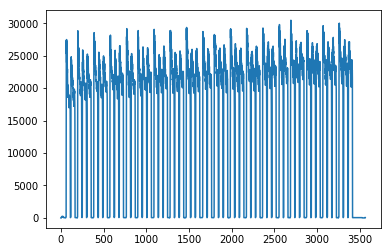

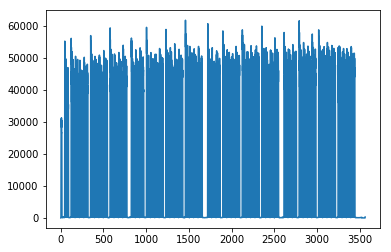

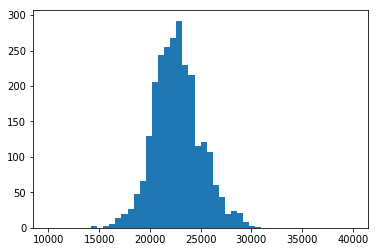

22673.9768081761
2317.580007305902


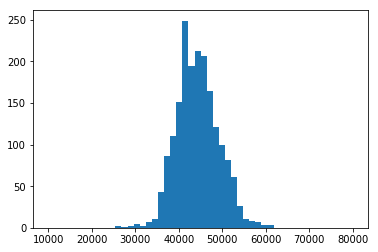

44312.16345123258
4586.750054668648


In [24]:
plt.plot(rates321177)
plt.show()
plt.plot(rates305862)
plt.show()
plt.hist(rates321177,range=[10000,40000],bins=50)
plt.show()
print np.ma.masked_outside(rates321177,10000.,100000).mean()
print np.ma.masked_outside(rates321177,10000.,100000).std()
plt.hist(rates305862,range=[10000,80000],bins=50)
plt.show()
print np.ma.masked_outside(rates305862,15000.,100000).mean()
print np.ma.masked_outside(rates305862,35000.,100000).std()